In [133]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')

In [134]:
data_2 = pd.read_csv('../output/csi_data.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()

,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9,sub10,...,sub22,sub23,sub24,sub25,sub26,sub27,sub28,sub29,sub30,label
0,21.095023,26.305893,29.068884,30.000000,31.827661,32.000000,33.301652,32.140317,33.015148,33.955854,...,33.241540,33.301652,33.060551,31.144823,30.066593,28.425341,26.476405,22.825424,19.104973,0
1,18.384776,23.769729,25.495098,27.073973,28.017851,28.861739,29.154759,29.410882,29.068884,29.410882,...,30.066593,30.479501,30.265492,28.017851,26.925824,26.000000,23.853721,21.023796,17.464249,0
2,20.615528,26.019224,28.017851,30.083218,31.304952,32.310989,33.105891,32.893768,34.885527,34.205263,...,33.105891,31.953091,31.780497,31.384710,28.792360,28.301943,27.294688,22.627417,20.248457,0
3,20.808652,27.073973,29.068884,30.413813,31.906112,32.984845,32.449961,33.734256,34.409301,34.234486,...,33.421550,33.136083,33.421550,31.256999,30.805844,29.120440,26.400758,23.706539,20.000000,0
4,21.095023,26.305893,29.000000,30.149627,31.622777,32.557641,33.837849,33.541020,33.600595,34.234486,...,33.015148,32.388269,33.015148,31.400637,29.681644,28.460499,26.570661,22.472205,19.723083,0


In [135]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]

In [136]:
x_train, x_test, y_train, y_test = train_test_split(
    X_data, target,  test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)

X_train.shape:  (838860, 30)
X_test.shape:  (209715, 30)


In [137]:
# Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X_data)
data_scaled
print(data_scaled)
# standardizer = StandardScaler()
# data_scaled = standardizer.fit_transform(X_data)
# data_scaled
# print(data_scaled)

[[0.43271925 0.49498833 0.48492583 ... 0.24133966 0.28960229 0.        ]
 [0.38935199 0.43196543 0.43599803 ... 0.22229053 0.26473141 0.        ]
 [0.42781733 0.47645362 0.48631736 ... 0.23924607 0.30693576 0.        ]
 ...
 [0.42781733 0.4726626  0.46211161 ... 0.28371094 0.34897434 0.        ]
 [0.42418799 0.45980853 0.45682696 ... 0.26956686 0.34566645 0.        ]
 [0.43466512 0.48021577 0.46473218 ... 0.27429466 0.33348648 0.        ]]


In [138]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[0.42880203, 0.4637008 , 0.44908774, ..., 0.2179738 , 0.26473141,
        0.        ],
       [0.47996513, 0.52188547, 0.50808036, ..., 0.24592827, 0.31868872,
        0.        ],
       [0.49617171, 0.51550726, 0.50701369, ..., 0.24683576, 0.30203051,
        0.        ],
       ...,
       [0.42781733, 0.4726626 , 0.46211161, ..., 0.28371094, 0.34897434,
        0.        ],
       [0.42418799, 0.45980853, 0.45682696, ..., 0.26956686, 0.34566645,
        0.        ],
       [0.43466512, 0.48021577, 0.46473218, ..., 0.27429466, 0.33348648,
        0.        ]])

In [139]:
x_train = x_train.values.reshape(838860, 30, 1)
x_test = x_test.values.reshape(209715, 30, 1)
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)

X_train.shape:  (838860, 30, 1)
X_test.shape:  (209715, 30, 1)


In [140]:
# Set up parameters
n_steps = 30
n_features = 1
epochs = 5

# Create a traditional RNN network
model_RNN = tf.keras.Sequential()
model_RNN.add(tf.keras.layers.LSTM(64, input_shape=(
    n_steps, n_features),  return_sequences=True,))
model_RNN.add(tf.keras.layers.Dense(32, activation='relu'))
model_RNN.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_RNN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
dense_16 (Dense)             (None, 30, 32)            2080      
_________________________________________________________________
dense_17 (Dense)             (None, 30, 1)             33        
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [141]:
cp1 = ModelCheckpoint('../save/rnn_model/', save_best_only=True)
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=2,
#     mode='min'
# )

model_RNN.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])


In [142]:
history_1 = model_RNN.fit(x_train, y_train, epochs=epochs,
                      batch_size=10, callbacks=[cp1])


Epoch 1/5
83886/83886 [==============================] - 401s 5ms/step - loss: 0.3907 - accuracy: 0.8601
Epoch 2/5
83886/83886 [==============================] - 398s 5ms/step - loss: 0.3663 - accuracy: 0.8653
Epoch 3/5
83886/83886 [==============================] - 397s 5ms/step - loss: 0.3525 - accuracy: 0.8685
Epoch 4/5
83886/83886 [==============================] - 398s 5ms/step - loss: 0.3453 - accuracy: 0.8702
Epoch 5/5
83886/83886 [==============================] - 400s 5ms/step - loss: 0.3408 - accuracy: 0.8714


In [143]:
print(history_1.history)


{'loss': [0.3906574249267578, 0.366347074508667, 0.35247188806533813, 0.34533819556236267, 0.3408077359199524], 'accuracy': [0.8601388931274414, 0.8653426170349121, 0.868477463722229, 0.8701972961425781, 0.8713506460189819]}


In [144]:
best_score = max(history_1.history['accuracy'])

print(best_score)

0.8713506460189819


In [145]:
history_1.history.keys()

dict_keys(['loss', 'accuracy'])

In [146]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=20)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=20, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

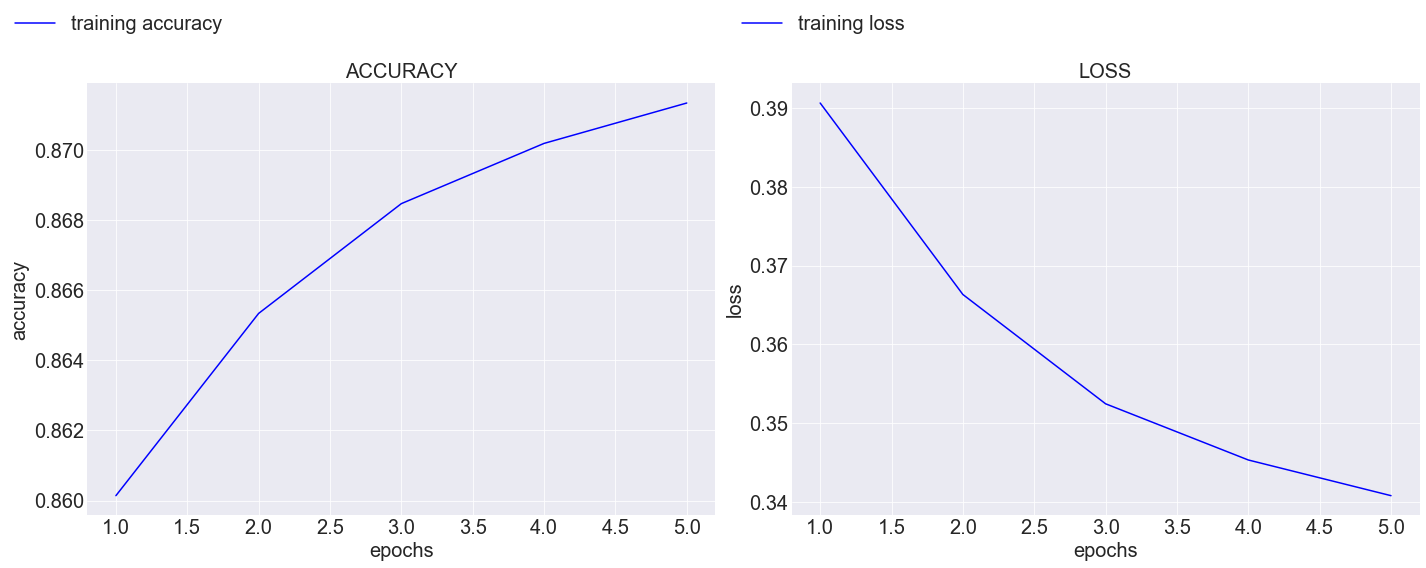

In [147]:
plot_history(history_1)
